In [124]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ast

In [38]:
restaurants_df = pd.read_csv('output/responses/batch123_restaurants_dataset.csv')

In [39]:
restaurants_df.shape

(6139, 17)

In [40]:
restaurants = restaurants_df.copy()

In [5]:
reviews_df = pd.read_csv('output/responses/batch123_reviews_dataset.csv')

/var/folders/cw/6l8njb_s1ml7w7g9qkx38dlh0000gn/T/ipykernel_88783/772375278.py:1: DtypeWarning: Columns (8,9,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv('output/responses/batch123_reviews_dataset.csv')


In [6]:
reviews_df.shape

(2602486, 16)

In [7]:
reviews = reviews_df.copy()

# Data Cleaning

## Drop unnnecessary columns

In [41]:
restaurants = restaurants.drop(columns=['Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

In [42]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_id       6139 non-null   object 
 1   name           6139 non-null   object 
 2   reviews        6139 non-null   int64  
 3   main_category  6064 non-null   object 
 4   categories     6064 non-null   object 
 5   main_rating    6139 non-null   float64
 6   address        6054 non-null   object 
 7   link           6139 non-null   object 
 8   review_photos  6139 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 431.8+ KB


In [43]:
restaurants.shape

(6139, 9)

## Fill NaN values

In [44]:
restaurants.isnull().sum()

place_id          0
name              0
reviews           0
main_category    75
categories       75
main_rating       0
address          85
link              0
review_photos     0
dtype: int64

In [45]:
restaurants.fillna({'address': 'Singapore'}, inplace=True)

In [46]:
restaurants.fillna({'main_category': 'Unknown'}, inplace=True)

In [47]:
restaurants.fillna({'categories': "['Unknown']"}, inplace=True)

In [48]:
restaurants.isnull().sum()

place_id         0
name             0
reviews          0
main_category    0
categories       0
main_rating      0
address          0
link             0
review_photos    0
dtype: int64

## Drop any duplicates

In [49]:
restaurants[restaurants.duplicated(keep=False)]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
0,ChIJ-RfByosR2jERDz6NDnVW1IA,Huats Kee Fish Head Steamboat,74,Restaurant,['Restaurant'],3.1,"200 Turf Club Road, #01-05 The Grandstand, Sin...",https://www.google.com/maps/place/Huats+Kee+Fi...,['https://lh5.googleusercontent.com/p/AF1QipNf...
32,ChIJrfF8eUIX2jERYrbRZDmRI1s,Hup Chong Hakka Yong Dou Foo,460,Hawker Stall,['Hawker Stall'],4.0,"124 Lor 1 Toa Payoh, Singapore 310124",https://www.google.com/maps/place/Hup+Chong+Ha...,['https://lh5.googleusercontent.com/p/AF1QipMq...
33,ChIJlT54vmsX2jER3zBPOzr6pdg,Hup Chong Yong Tau Foo Blk 203,348,Coffee shop,['Coffee shop'],4.2,"Toa Payoh N, #01-1121 Block 203, Singapore 310203",https://www.google.com/maps/place/Hup+Chong+Yo...,['https://lh5.googleusercontent.com/p/AF1QipOC...
46,ChIJAfn2kRYX2jERNzxGvQt63F4,I Love Taimei 我愛台妹 Junction 8 | Fried Chicken ...,186,Fried chicken takeaway,"['Fried chicken takeaway', 'Bubble tea store',...",3.9,"9 Bishan Pl, #B1-22 Junction 8, Singapore 579837",https://www.google.com/maps/place/I+Love+Taime...,['https://lh5.googleusercontent.com/p/AF1QipMV...
48,ChIJx64m9boZ2jERQxfwfy3Nl70,I Love Taimei 我愛台妹 Bugis Junction | Fried Chic...,205,Fried chicken takeaway,"['Fried chicken takeaway', 'Bubble tea store',...",4.0,"230 Victoria St, #B1-K11 to 11A, Singapore 188024",https://www.google.com/maps/place/I+Love+Taime...,['https://lh5.googleusercontent.com/p/AF1QipNX...
...,...,...,...,...,...,...,...,...,...
6133,ChIJ6-YzAysX2jERKmeXREbO7VM,Hualong Fishhead Steamboat,8,Chinese restaurant,['Chinese restaurant'],2.6,"Blk 631 Hougang Ave 8, #01-06, Singapore 530631",https://www.google.com/maps/place/Hualong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipOW...
6134,ChIJ0T6YJPkZ2jER4SLNFf4Zthg,炭香 Charcoal Fish Head Steamboat Kallang,490,Chinese restaurant,['Chinese restaurant'],4.1,"5 Kallang Pl, Singapore 339152",https://www.google.com/maps/place/%E7%82%AD%E9...,['https://lh5.googleusercontent.com/p/AF1QipM_...
6135,ChIJ6Y9kApkb2jERVPmthHd725A,Hualong Fishhead Steamboat,3,Coffee shop,['Coffee shop'],4.3,40 Margaret Dr,https://www.google.com/maps/place/Hualong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipNh...
6136,ChIJT49EoY0R2jERS0Ll4u0WxzU,HuaLong Fishhead Steamboat,45,Steamboat restaurant,"['Steamboat restaurant', 'Cafe', 'Coffee shop']",3.7,"155 Bukit Batok Street 11, #01-324, Singapore ...",https://www.google.com/maps/place/HuaLong+Fish...,['https://lh5.googleusercontent.com/p/AF1QipPQ...


In [50]:
restaurants.drop_duplicates(inplace=True)

In [51]:
restaurants.shape

(5082, 9)

In [52]:
restaurants[restaurants.duplicated(subset=['place_id', 'name', 'reviews', 'address'])]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
52,ChIJl_5IjwkX2jERSNvWC6pMvA0,I Love Taimei The Woodleigh Mall | Fried Chick...,28,Fried chicken takeaway,"['Fried chicken takeaway', 'Bubble tea store',...",4.3,"11 Bidadari Park Dr, B1-K32, Singapore 367803",https://www.google.com/maps/place/I+Love+Taime...,['https://lh5.googleusercontent.com/p/AF1QipNI...
53,ChIJx64m9boZ2jERQxfwfy3Nl70,I Love Taimei 我愛台妹 Bugis Junction | Fried Chic...,205,Fried chicken takeaway,"['Fried chicken takeaway', 'Bubble tea store',...",4.0,"230 Victoria St, #B1-K11 to 11A, Singapore 188024",https://www.google.com/maps/place/I+Love+Taime...,['https://lh5.googleusercontent.com/p/AF1QipNX...
82,ChIJV33tA-gZ2jERe0i-6w2umxk,Imperial Grand Cantonese Cuisine,249,Asian restaurant,"['Asian restaurant', 'Cantonese restaurant']",4.5,"11 Sam Leong Rd, #03-01 TRIO BUILDING, Singapo...",https://www.google.com/maps/place/Imperial+Gra...,['https://lh5.googleusercontent.com/p/AF1QipP9...
99,ChIJn5GxhcIZ2jERHofsKnfrPEc,Imperial Treasure Fine Chinese Cuisine (Marina...,552,Chinese restaurant,['Chinese restaurant'],4.0,"8 Bayfront Avenue Marina Bay Sands, Level 2, L...",https://www.google.com/maps/place/Imperial+Tre...,['https://lh5.googleusercontent.com/p/AF1QipOy...
101,ChIJn3KRuzgZ2jERq14svIz5O9g,Imperial Treasure Fine Teochew Cuisine,404,Chinese restaurant,['Chinese restaurant'],4.1,"Orchard Turn, #03-05 ION Orchard, 2, Singapore...",https://www.google.com/maps/place/Imperial+Tre...,['https://lh5.googleusercontent.com/p/AF1QipPx...
...,...,...,...,...,...,...,...,...,...
6115,ChIJG0v_dVAZ2jERyoS6xFfB1_w,Beirut Express (Shenton),144,Fast food restaurant,"['Fast food restaurant', 'Greek restaurant', '...",3.9,"1 Shenton Wy, #01-06, Singapore 068803",https://www.google.com/maps/place/Beirut+Expre...,['https://lh5.googleusercontent.com/p/AF1QipOH...
6117,ChIJOe75OhQZ2jERg1rJsn5jEoA,House of Malaysia,38,Malaysian restaurant,['Malaysian restaurant'],3.6,"200 Jln Sultan, #01-25 Textile Centre, Singapo...",https://www.google.com/maps/place/House+of+Mal...,['https://lh5.googleusercontent.com/p/AF1QipPP...
6118,ChIJJR9auHAZ2jER8enAJuyfCyQ,House of Peranakan Petit,317,Nyonya restaurant,"['Nyonya restaurant', 'Asian restaurant', 'Res...",4.2,"42 Eng Hoon St, Estate 169785",https://www.google.com/maps/place/House+of+Per...,['https://lh5.googleusercontent.com/p/AF1QipNE...
6120,ChIJdwjQ2tQZ2jERFYU-5f1aW2g,Hoàng Hâu - Vietnamese Restaurant,239,Vietnamese restaurant,['Vietnamese restaurant'],4.6,"146 01, 1090 Jalan Bukit Merah, Block 146, 160146",https://www.google.com/maps/place/Ho%C3%A0ng+H...,['https://lh5.googleusercontent.com/p/AF1QipMC...


In [53]:
restaurants = restaurants.drop_duplicates(subset=['place_id', 'name', 'reviews', 'address'])

In [54]:
restaurants.shape

(4660, 9)

## Remove non-dining establishments

In [55]:
main_categories = list(restaurants['main_category'])
main_categories = list(set(main_categories))
main_categories.sort()

In [56]:
main_categories

['ATM',
 'Accountant',
 'Acupuncture clinic',
 'Advertising agency',
 'African restaurant',
 'Air conditioning store',
 'American restaurant',
 'Anglican church',
 'Antique store',
 'Apartment building',
 'Apartment complex',
 'Argentinian restaurant',
 'Art cafe',
 'Art center',
 'Art gallery',
 'Art museum',
 'Art studio',
 'Artist',
 'Artistic handicrafts',
 'Asian fusion restaurant',
 'Asian restaurant',
 'Association / Organization',
 'Athletic field',
 'Auditor',
 'Authentic Japanese restaurant',
 'Ayam penyet restaurant',
 'Açaí shop',
 'Baby store',
 'Bakery',
 'Ballet school',
 'Bank',
 'Bar',
 'Bar & grill',
 'Barbecue restaurant',
 'Barber shop',
 'Beauty product supplier',
 'Beauty salon',
 'Bed & breakfast',
 'Bicycle club',
 'Bistro',
 'Boutique',
 'Branding agency',
 'Brazilian restaurant',
 'Breakfast restaurant',
 'Bridal shop',
 'Brunch restaurant',
 'Bubble tea store',
 'Buffet restaurant',
 'Burmese restaurant',
 'Bus Interchange',
 'Bus depot',
 'Bus stop',
 'Busin

In [57]:
len(main_categories)

428

In [86]:
cats_to_remove = ['ATM',
 'Accountant',
 'Acupuncture clinic',
 'Advertising agency',
 'Air conditioning store',
 'Anglican church',
 'Antique store',
 'Apartment building',
 'Apartment complex',
 'Art center',
 'Art gallery',
 'Art museum',
 'Art studio',
 'Artist',
 'Artistic handicrafts',
 'Association / Organization',
 'Athletic field',
 'Auditor',
 'Açaí shop',
 'Baby store',
 'Bakery',
 'Ballet school',
 'Bank',
 'Barber shop',
 'Beauty product supplier',
 'Beauty salon',
 'Bed & breakfast',
 'Bicycle club',
 'Boutique',
 'Branding agency',
 'Bridal shop',
 'Bus Interchange',
 'Bus depot',
 'Bus stop',
 'Business center',
 'Business management consultant',
 'Butcher shop',
 'Candle store',
 'Car dealer',
 'Car wash',
 'Caterer',
 'Catering food and drink supplier',
 'Catholic church',
 'Cement manufacturer',
 'Charity',
 'Chartered accountant',
 "Children's clothing store",
 'Chinese Takeaway',
 'Chinese language school',
 'Chocolate artisan',
 'Chocolate shop',
 'Clothing store',
 'Club',
 'Coaching center',
 'Coffee shop',
 'Coffee store',
 'Coffee wholesaler',
 'Commercial cleaning service',
 'Computer security service',
 'Computer store',
 'Computer support and services',
 'Condominium complex',
 'Confectionery store',
 'Consultant',
 'Contractor',
 'Convenience store',
 'Corporate gift supplier',
 'Corporate office',
 'Cosmetics and perfumes supplier',
 'Counselor',
 'Coworking space',
 'Cultural association',
 'Curtain and upholstery cleaning service',
 'Dance school',
 'Dance store',
 'Day care center',
 'Day spa',
 'Delivery Restaurant',
 'Department store',
 'Design agency',
 'Designer Clothing Shop',
 'Diving center',
 'Dog cafe',
 'E-commerce service',
 'Education center',
 'Educational institution',
 'Electroplating Service',
 'Employment agency',
 'Employment center',
 'Employment consultant',
 'Engineer',
 'Event management company',
 'Event planner',
 'Event venue',
 'Family service center',
 'Farm shop',
 'Fashion accessories store',
 'Fast food restaurant',
 'Finance broker',
 'Financial institution',
 'Financial planner',
 'Fish store',
 'Florist',
 'Flower delivery',
 'Food and drink',
 'Food court',
 'Food manufacturer',
 'Food manufacturing supply',
 'Food producer',
 'Food products supplier',
 'Freight forwarding service',
 'Frozen food store',
 'Fruit and vegetable wholesaler',
 'Fruit wholesaler',
 'Furniture store',
 'Garden center',
 'Gemologist',
 'Gift shop',
 'Gold dealer',
 'Goldsmith',
 'Gourmet grocery store',
 'Government office',
 'Grocery store',
 'Gym and Fitness Centre',
 'HDB Flats',
 'Hair salon',
 'Hardware store',
 'Haute French restaurant',
 'Hawker Stall',
 'Hawker center',
 'Health and beauty shop',
 'Health food store',
 'Hematologist',
 'Heritage building',
 'Hiking area',
 'Holding company',
 'Hotel',
 'House cleaning service',
 'Housing development',
 'Ice cream shop',
 'Ice supplier',
 'Importer',
 'Importer and Exporter',
 'Indian grocery store',
 'Indoor golf course',
 'Industrial Real Estate Agency',
 'Industrial equipment supplier',
 'Industry',
 'Information services',
 'Insurance',
 'Insurance company',
 'Interior designer',
 'Internet marketing service',
 'Italian grocery store',
 'Japanese confectionery shop',
 'Japanese grocery store',
 'Jeweler',
 'Jewelry store',
 'Karaoke bar',
 'Kiosk',
 'Kitchen',
 'Kitchen supply store',
 'Laboratory equipment supplier',
 'Language school',
 'Law firm',
 'Lawyer',
 'Learning center',
 'Legal services',
 'Lighting store',
 'Live music venue',
 'Local government office',
 'Lodging',
 'Lottery retailer',
 'Lounge',
 'Luggage store',
 'MRT/LRT Station',
 'Manufacturer',
 'Market',
 'Marketing agency',
 'Marketing consultant',
 'Martial arts club',
 'Massage spa',
 'Maternity store',
 'Mattress store',
 'Media company',
 'Medical Center',
 'Medical clinic',
 'Medical equipment supplier',
 'Memorial park',
 'Mining company',
 'Monument maker',
 'Motorcycle rental agency',
 'Movie rental store',
 'Moving and storage service',
 'Muay Thai boxing gym',
 'Music producer',
 'Music school',
 'Nail salon',
 'National forest',
 'Non-governmental organization',
 'Non-profit organization',
 'Occupational therapist',
 'Optician',
 'Organic food store',
 'Otolaryngologist',
 'Park',
 'Parking lot',
 'Pastry shop',
 'Performing arts group',
 'Performing arts theater',
 'Personal trainer',
 'Pest control service',
 'Pet Shop',
 'Photographer',
 'Photography service',
 'Plant nursery',
 'Plastic products supplier',
 'Playground',
 'Police station',
 'Preschool',
 'Print shop',
 'Property Investment',
 'Property management company',
 'Public parking space',
 'Publisher',
 'Real estate agency',
 'Real estate agent',
 'Real estate consultant',
 'Recording studio',
 'Religious destination',
 'Religious organization',
 'Restaurant supply store',
 'Rice restaurant',
 'Salad shop',
 'Sandwich shop',
 'School',
 'Seafood wholesaler',
 'Self service restaurant',
 'Serviced accommodation',
 'Shipping and mailing service',
 'Shipping service',
 'Shoe Shop',
 'Shoe repair shop',
 'Shop',
 'Shopping mall',
 'Social club',
 'Souvenir store',
 'Stationery store',
 'Supermarket',
 'Tattoo and piercing shop',
 'Tattoo shop',
 'Tea and coffee shop',
 'Tea store',
 'Tourist attraction',
 'Toy store',
 'Transportation service',
 'Travel agency',
 'Tutoring service',
 'Unknown',
 'Used clothing store',
 'Video production service',
 'Walk-in clinic',
 'Warehouse',
 'Waxing hair removal service',
 'Website designer',
 'Wedding photographer',
 'Wedding planner',
 'Wedding store',
 'Wedding venue',
 'Wellness center',
 'Wellness program',
 'Wholesaler',
 'Wine cellar',
 "Women's clothing store",
 'Yoga studio']

In [87]:
cats_to_remove = [cat.lower() for cat in cats_to_remove]
mask = restaurants['main_category'].str.lower().isin(cats_to_remove)
restaurants = restaurants[~mask]
restaurants.shape

(3179, 9)

# Establish Consideration Set

## Set Minimum Rating and Reviews

In [160]:
restaurants_set = restaurants[(restaurants['main_rating'] >= 3.5) & (restaurants['reviews'] >= 10)].copy()
restaurants_set.shape

(2695, 9)

## Fill In Actual Category for Significant Restaurants Which Only Have 'Restaurant' as Main Category

In [161]:
num_restaurants_by_categories = restaurants_set['main_category'].value_counts()
num_restaurants_by_categories

Restaurant                              483
Cafe                                    216
Chinese restaurant                      195
Indian restaurant                       150
Vietnamese restaurant                   108
                                       ... 
Tapas bar                                 1
Hong Kong style fast food restaurant      1
Okonomiyaki restaurant                    1
Egyptian restaurant                       1
Pizza takeaway                            1
Name: main_category, Length: 141, dtype: int64

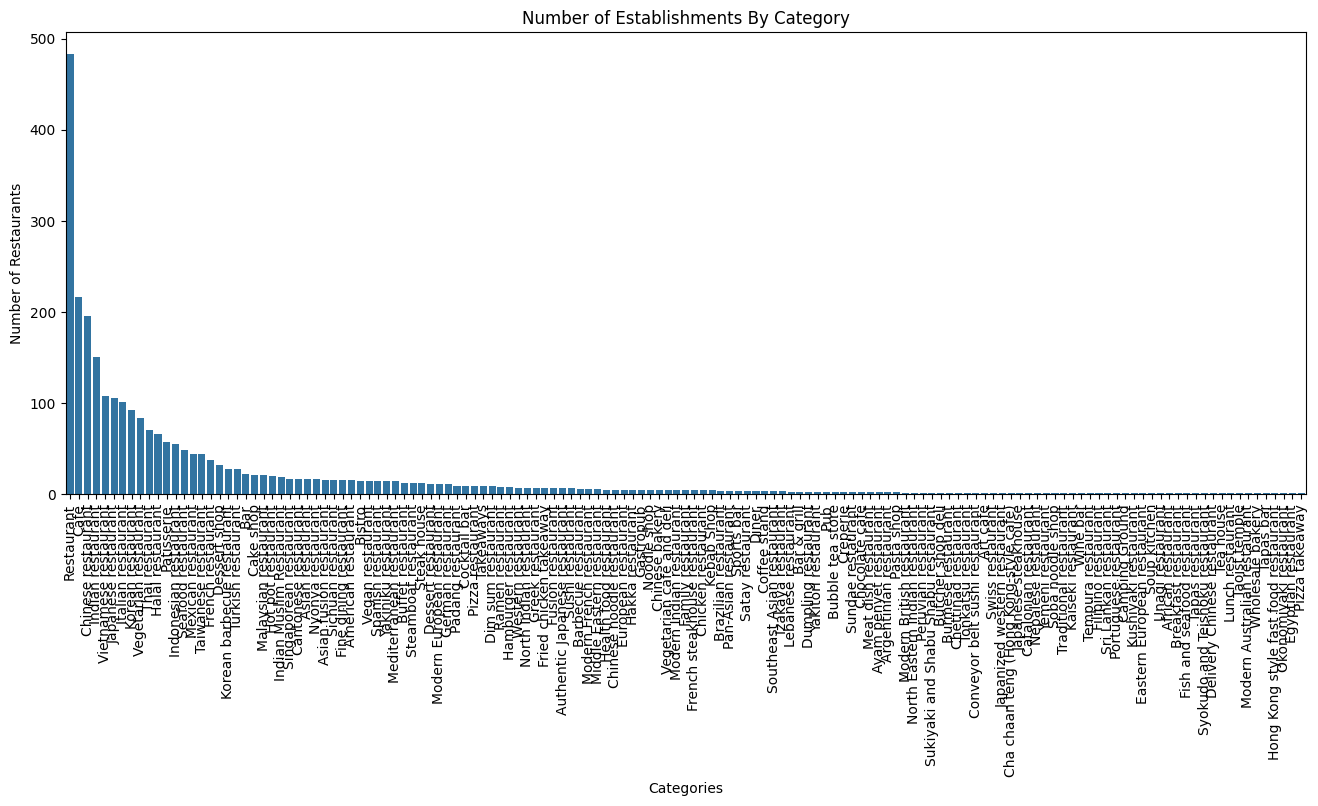

In [162]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants_set, x='main_category', order=num_restaurants_by_categories.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

In [163]:
# Restaurants with only 'Restaurant' category
no_cat_restaurants = restaurants_set[restaurants_set['main_category'] == 'Restaurant']
no_cat_restaurants

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
1,ChIJPQDapSMZ2jERBrdWBTuaUTE,Huda Restaurant SG 胡大饭店,312,Restaurant,['Restaurant'],4.3,"Temple St, #56, Singapore 058601",https://www.google.com/maps/place/Huda+Restaur...,['https://lh5.googleusercontent.com/p/AF1QipP_...
3,ChIJ-WJNg9gZ2jERNJWbDrY4Z4w,Huevos @ River Valley,92,Restaurant,['Restaurant'],4.5,"46 Kim Yam Rd, New Bahru, Singapore 239351",https://www.google.com/maps/place/Huevos+@+Riv...,['https://lh5.googleusercontent.com/p/AF1QipNk...
25,ChIJ9T3-jW0Z2jERsES-aHHFhrU,Humpback,689,Restaurant,['Restaurant'],4.5,"18-20 Bukit Pasoh Rd, Singapore 089834",https://www.google.com/maps/place/Humpback/@1....,['https://lh5.googleusercontent.com/p/AF1QipNc...
26,ChIJiSqmdAAZ2jERAEz4rRdcAmA,Hundred Grains,19,Restaurant,['Restaurant'],4.2,"1 Wallich St, B2 #30, Singapore 078881",https://www.google.com/maps/place/Hundred+Grai...,['https://lh5.googleusercontent.com/p/AF1QipMx...
41,ChIJx4dWfqYZ2jERp8rNh_Qd2kQ,Hyang-to-gol Korean Restaurant Raffles City,401,Restaurant,['Restaurant'],3.6,"252 north bridge road, #b1-74, raffles city sh...",https://www.google.com/maps/place/Hyang-to-gol...,['https://lh5.googleusercontent.com/p/AF1QipNt...
...,...,...,...,...,...,...,...,...,...
6083,ChIJy1BG-K8Z2jER7sm1rFx4_M4,Hong Hu Restaurant Steamboat Buffet,22,Restaurant,['Restaurant'],4.0,"12 Liang Seah St, Singapore 189033",https://www.google.com/maps/place/Hong+Hu+Rest...,['https://lh5.googleusercontent.com/p/AF1QipPg...
6103,ChIJXYrMYNA0K4gRwtEJIQ7lZ6s,Hooters Downtown Toronto,2103,Restaurant,"['Restaurant', 'American restaurant', 'Chicken...",3.6,"280 Adelaide St W, Toronto, ON M5V 1P6, Canada",https://www.google.com/maps/place/Hooters+Down...,['https://lh5.googleusercontent.com/p/AF1QipNG...
6108,ChIJQ6cPiSMZ2jERYP9lJruuJFA,Hopscotch (Gardens by the Bay),462,Restaurant,"['Restaurant', 'Cocktail bar']",4.5,"18 Marina Gardens Dr, #01-21 Bayfront Plaza (N...",https://www.google.com/maps/place/Hopscotch+(G...,['https://lh5.googleusercontent.com/p/AF1QipOR...
6116,ChIJvRlPUrwP2jERvGvJbVmKm9Q,House Of Kebabs,25,Restaurant,['Restaurant'],3.6,"762 Jurong West Street 75, Singapore 640762",https://www.google.com/maps/place/House+Of+Keb...,['https://lh5.googleusercontent.com/p/AF1QipOa...


### For restaurants with a secondary category within 'categories', set that as the main category

In [164]:
restaurants_set['categories'] = restaurants_set['categories'].apply(lambda x: ast.literal_eval(x))

In [169]:
sec_cat_mask = (restaurants_set['main_category'] == 'Restaurant') & (restaurants_set['categories'].apply(lambda x: x != ['Restaurant']))
restaurants_set[sec_cat_mask]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
62,ChIJ8Ukg_y8Z2jER-HZ-grS_C4Q,INDO THAI Bar & Restaurant,232,Restaurant,"[Restaurant, Indian restaurant, Thai restaurant]",4.3,"2 Serangoon Rd, #01-16 Tekka Place, Singapore ...",https://www.google.com/maps/place/INDO+THAI+Ba...,['https://lh5.googleusercontent.com/p/AF1QipPQ...
120,ChIJd3pamCsZ2jER6KXqGOyWk90,We Desi - Indian Bistro,732,Restaurant,"[Restaurant, Catering food and drink supplier,...",4.6,371 Beach Road 01-02 City Gate Mall Kampong Gl...,https://www.google.com/maps/place/We+Desi+-+In...,['https://lh5.googleusercontent.com/p/AF1QipPX...
166,ChIJbwht1dk82jERGOoy1353_1E,HeritageOne Restaurant,443,Restaurant,"[Restaurant, Caterer, Delivery Restaurant]",4.1,"38 Upper Weld Rd, Singapore 207395",https://www.google.com/maps/place/HeritageOne+...,['https://lh5.googleusercontent.com/p/AF1QipOS...
171,ChIJVWiGKioZ2jERwdZeLDWGTrA,KUBES Indian Restobar,131,Restaurant,"[Restaurant, Bar, Bistro, Indian restaurant, N...",4.7,"31 Campbell Ln, Singapore 209903",https://www.google.com/maps/place/KUBES+Indian...,['https://lh5.googleusercontent.com/p/AF1QipN4...
187,ChIJtSdmJC4b2jERCGdu1y38LiM,Khansama @ Pasir Panjang,64,Restaurant,"[Restaurant, Grill, Bar, Bistro, Buffet restau...",4.5,"40 Pasir Panjang Rd, #02-40 Food Park, Mapletr...",https://www.google.com/maps/place/Khansama+@+P...,['https://lh5.googleusercontent.com/p/AF1QipPI...
...,...,...,...,...,...,...,...,...,...
5915,ChIJh6wGosEb2jERuTRX9vxr13c,Hathaway,461,Restaurant,"[Restaurant, Asian restaurant, South Asian res...",4.4,"Block 13 Dempsey Rd, #01-07, Singapore 249674",https://www.google.com/maps/place/Hathaway/@1....,['https://lh5.googleusercontent.com/p/AF1QipMk...
5966,ChIJs2Wgx6QZ2jERGZRjo0rnybI,Supreme Vege 善心缘,173,Restaurant,"[Restaurant, Health food restaurant, Vegan res...",4.3,"12 Queen St, #02-03 Hotel Royal Queens, Singap...",https://www.google.com/maps/place/Supreme+Vege...,['https://lh5.googleusercontent.com/p/AF1QipMO...
6103,ChIJXYrMYNA0K4gRwtEJIQ7lZ6s,Hooters Downtown Toronto,2103,Restaurant,"[Restaurant, American restaurant, Chicken wing...",3.6,"280 Adelaide St W, Toronto, ON M5V 1P6, Canada",https://www.google.com/maps/place/Hooters+Down...,['https://lh5.googleusercontent.com/p/AF1QipNG...
6108,ChIJQ6cPiSMZ2jERYP9lJruuJFA,Hopscotch (Gardens by the Bay),462,Restaurant,"[Restaurant, Cocktail bar]",4.5,"18 Marina Gardens Dr, #01-21 Bayfront Plaza (N...",https://www.google.com/maps/place/Hopscotch+(G...,['https://lh5.googleusercontent.com/p/AF1QipOR...


In [170]:
restaurants_set[sec_cat_mask, 'main_category'] = restaurants_set['categories'].apply(lambda x: x[1] if len(x) > 1 else x[0])

TypeError: unhashable type: 'Series'

In [117]:
no_sec_cat_mask = (restaurants_set['main_category'] == 'Restaurant') & (restaurants_set['categories'] == "['Restaurant']")

In [118]:
restaurants_set[no_sec_cat_mask].sort_values(by='reviews', ascending=False)

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
513,ChIJXWyRdPIZ2jER-L3ECGqyyGA,Josh's Grill,6746,Restaurant,['Restaurant'],4.6,"238 Thomson Rd, #02-68/69/70/71/72 Velocity@No...",https://www.google.com/maps/place/Josh%27s+Gri...,['https://lh5.googleusercontent.com/p/AF1QipPy...
1018,ChIJ-euYEgsZ2jERCrAbyP2uYug,Lime Restaurant,4065,Restaurant,['Restaurant'],4.6,"3 Upper Pickering St, Singapore 058289",https://www.google.com/maps/place/Lime+Restaur...,['https://lh5.googleusercontent.com/p/AF1QipPd...
5488,ChIJJdxqFKIX2jERvBM3WaIWUHk,Galangal,3952,Restaurant,['Restaurant'],4.9,"3 Bishan St 14, Singapore 579780",https://www.google.com/maps/place/Galangal/dat...,['https://lh5.googleusercontent.com/p/AF1QipMz...
5731,ChIJGXoEwloZ2jERIUSR4jA7ogQ,Ah Lock & Co,3877,Restaurant,['Restaurant'],4.8,"7 Wallich St, #B2 - 22 / 23 / 24, Singapore 07...",https://www.google.com/maps/place/Ah+Lock+%26+...,['https://lh5.googleusercontent.com/p/AF1QipMU...
3458,ChIJGXoEwloZ2jERIUSR4jA7ogQ,Ah Lock & Co,3872,Restaurant,['Restaurant'],4.8,"7 Wallich St, #B2 - 22 / 23 / 24, Singapore 07...",https://www.google.com/maps/place/Ah+Lock+%26+...,['https://lh5.googleusercontent.com/p/AF1QipMU...
...,...,...,...,...,...,...,...,...,...
1202,ChIJAQDw_o4a2jERry_FJXO6EFc,Big Mouth Mala Pot,13,Restaurant,['Restaurant'],4.0,"325 Clementi Ave 5, Block 325, Singapore 120325",https://www.google.com/maps/place/Big+Mouth+Ma...,['https://lh5.googleusercontent.com/p/AF1QipOz...
1533,ChIJ_XA854YZ2jER7hVvVfZPKbo,Hajjah Ratna Nasi Padang Halal Restaurant,12,Restaurant,['Restaurant'],3.8,"1 Beach Rd, Singapore 190001",https://www.google.com/maps/place/Hajjah+Ratna...,['https://lh5.googleusercontent.com/p/AF1QipPE...
1813,ChIJrWdJbgAZ2jER7GY9DJSCodU,Mata Thai,12,Restaurant,['Restaurant'],4.5,"Jln. Bukit Ho Swee, Block 34, Singapore 160034",https://www.google.com/maps/place/Mata+Thai/da...,['https://lh5.googleusercontent.com/p/AF1QipPt...
5762,ChIJD_79nMZW0DER84vC1pP2Uho,Da Guang Fishball Noodle Store ( Hakka Noodles ),11,Restaurant,['Restaurant'],4.2,"Kampung Sateh, 83000 Batu Pahat, Johor, Malaysia",https://www.google.com/maps/place/Da+Guang+Fis...,['https://lh5.googleusercontent.com/p/AF1QipNY...


# Basic Analysis

## Distribution of restaurants by ratings

### 🧑🏻‍🍳🧑🏻‍🍳 The average restaurant rating is 4.1; outliers range from rating of 0 to 3

In [27]:
restaurants['main_rating'].mean()

3.9724379562043795

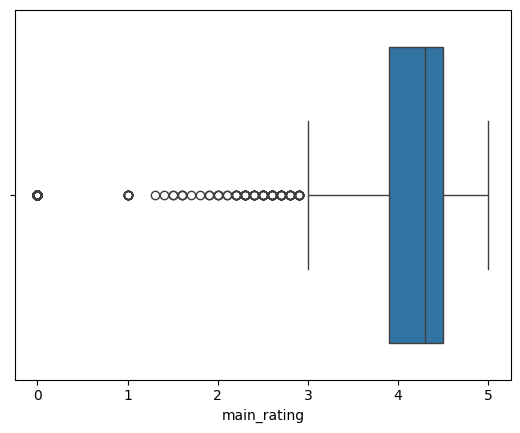

In [28]:
sns.boxplot(data=restaurants, x='main_rating');

### 🧑🏻‍🍳🧑🏻‍🍳 Majority of restaurants are rated 4.0 to 4.5

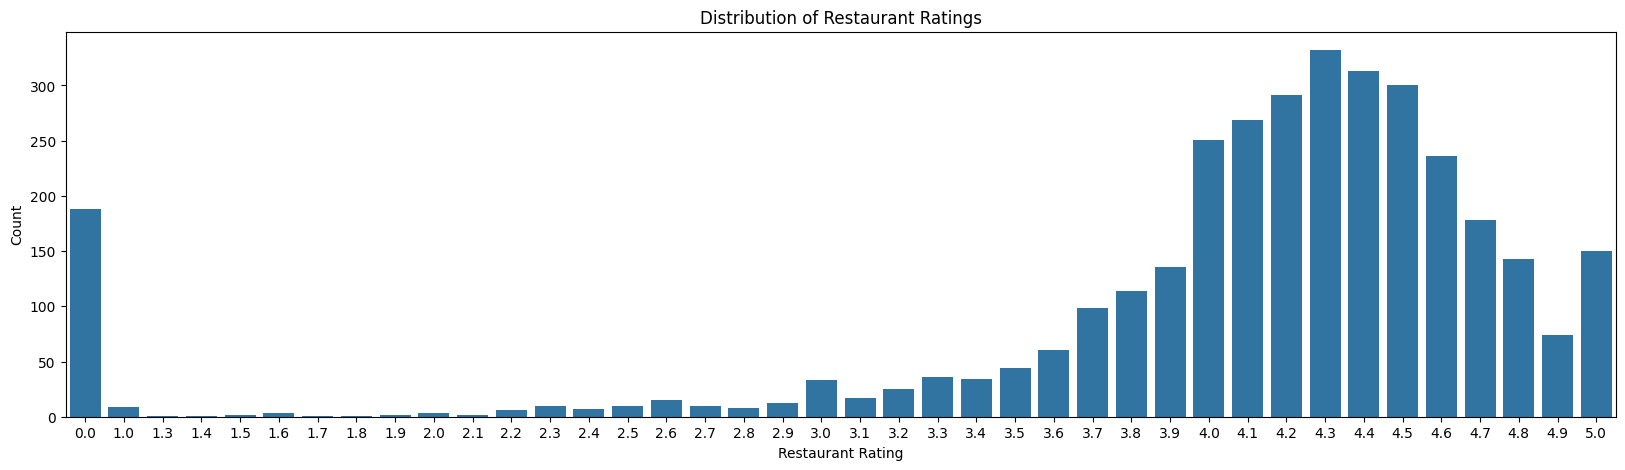

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(data=restaurants, x='main_rating')
plt.xlabel('Restaurant Rating')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')
plt.show()

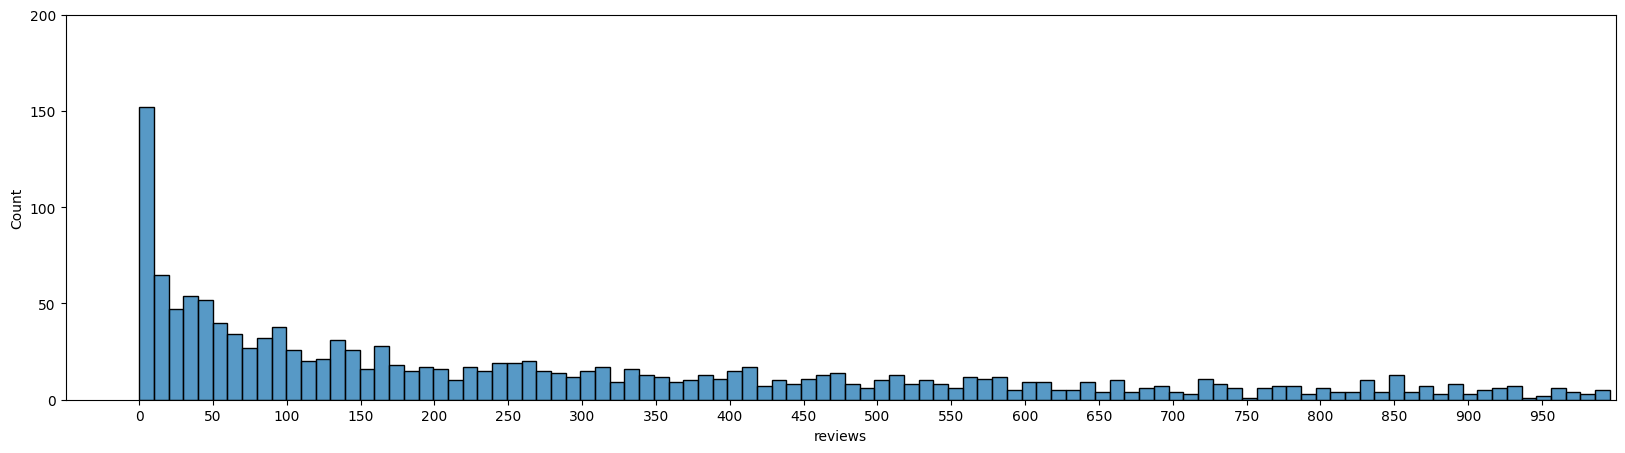

In [96]:
plt.figure(figsize=(20,5))
sns.histplot(data=restaurants[restaurants['reviews']<1000], x='reviews', bins=100)
plt.xticks(np.arange(0,1000,50))
plt.yticks(np.arange(0,600,50))
plt.xlim(right=1000)
plt.ylim(top=200);

### 🧑🏻‍🍳🧑🏻‍🍳 There are 573 restaurants rated 4.5 and above

In [45]:
top_rated = restaurants[restaurants['main_rating']>=4.5].sort_values(by='reviews', ascending=False)

In [46]:
top_rated.shape

(573, 9)

## Analysis of Reviews by Ratings

### 🧑🏻‍🍳🧑🏻‍🍳 First we should drop outliers in the number of reviews

In [47]:
restaurants_sans_outliers = restaurants[restaurants['reviews']<=1000] # 75th percentile is 772
restaurants_sans_outliers.describe()

,reviews,main_rating
count,1474.000000,1474.000000
mean,279.892809,4.053324
std,270.559586,0.912279
min,0.000000,0.000000
25%,49.000000,3.900000
50%,188.000000,4.300000
75%,454.750000,4.500000
max,996.000000,5.000000


### 🧑🏻‍🍳🧑🏻‍🍳 Ave number of reviews for restaurants rated >4 is significantly more

In [48]:
mean_reviews = restaurants_sans_outliers.groupby('main_rating')['reviews'].mean()
mean_reviews

main_rating
0.0      0.000000
1.0      1.750000
1.3      4.000000
1.6     14.000000
1.8     34.000000
1.9     38.000000
2.0     25.000000
2.1     35.000000
2.2     38.666667
2.3     43.500000
2.4     22.333333
2.5     40.000000
2.6     62.800000
2.7     45.250000
2.8     24.333333
2.9    153.000000
3.0     31.250000
3.1     73.000000
3.2     64.461538
3.3    138.375000
3.4    130.900000
3.5    131.375000
3.6    175.735294
3.7    236.133333
3.8    193.076923
3.9    292.885246
4.0    279.078431
4.1    344.456000
4.2    416.966667
4.3    367.875000
4.4    389.517241
4.5    322.577778
4.6    351.928571
4.7    303.756757
4.8    235.863636
4.9    123.764706
5.0     15.577778
Name: reviews, dtype: float64

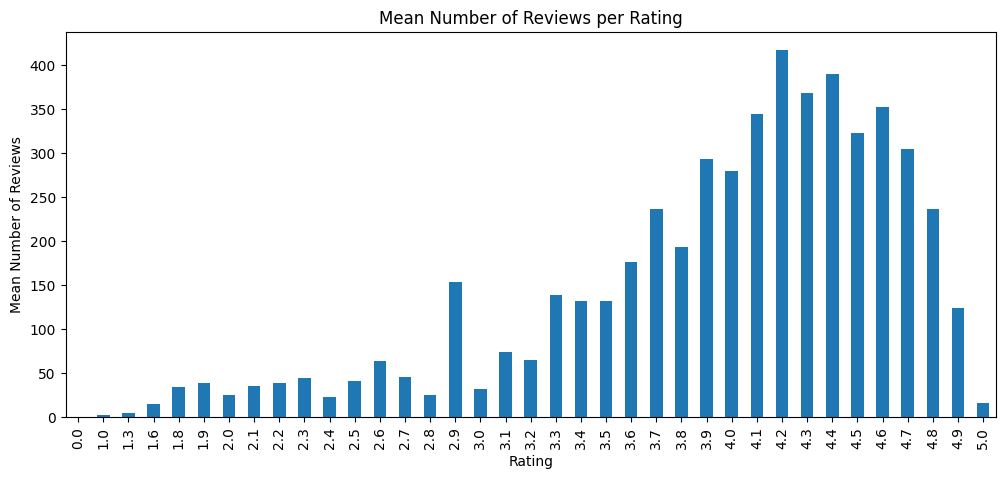

In [57]:
plt.figure(figsize=(12, 5))
mean_reviews.plot(kind='bar')
plt.title('Mean Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Number of Reviews')
plt.xticks(rotation=90)
plt.show()

# Explore Categorical Data

## Distribution of Restaurant Categories

Restaurant Categories: Analyze the distribution of restaurant types (e.g., cuisine, price range).
Cross-tabulations: Perform cross-tabulations between categorical variables (e.g., rating vs. cuisine type).
Reviewer Information: Explore demographics or other available information about reviewers (e.g., location, review count).

### Number of Establishments Per Category

#### 🧑🏻‍🍳🧑🏻‍🍳 There are many minor categories which make it hard to estimate the core categories of restaurants

In [58]:
num_restaurants_by_categories = restaurants['main_category'].value_counts()

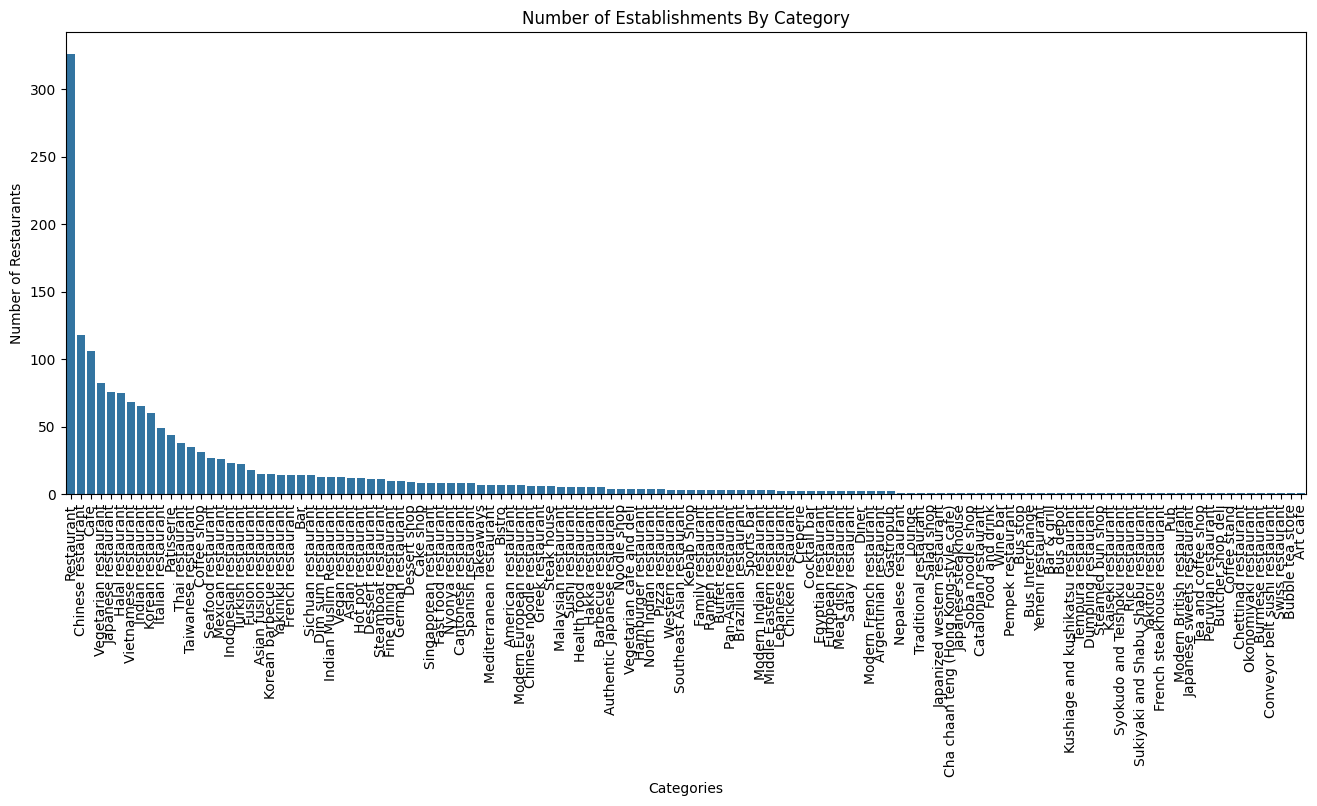

In [60]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants, x='main_category', order=num_restaurants_by_categories.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

#### 🧑🏻‍🍳🧑🏻‍🍳 We can try just cutting off the minor categories with membership lower than the mean

In [59]:
num_restaurants_by_categories_cut = num_restaurants_by_categories[num_restaurants_by_categories>num_restaurants_by_categories.mean()]
num_restaurants_by_categories_cut

Restaurant                    326
Chinese restaurant            118
Cafe                          106
Vegetarian restaurant          82
Japanese restaurant            76
Halal restaurant               75
Vietnamese restaurant          68
Indian restaurant              65
Korean restaurant              60
Italian restaurant             49
Patisserie                     44
Thai restaurant                38
Taiwanese restaurant           35
Coffee shop                    31
Seafood restaurant             27
Mexican restaurant             26
Indonesian restaurant          23
Turkish restaurant             22
Fusion restaurant              18
Asian fusion restaurant        15
Korean barbecue restaurant     15
Name: main_category, dtype: int64

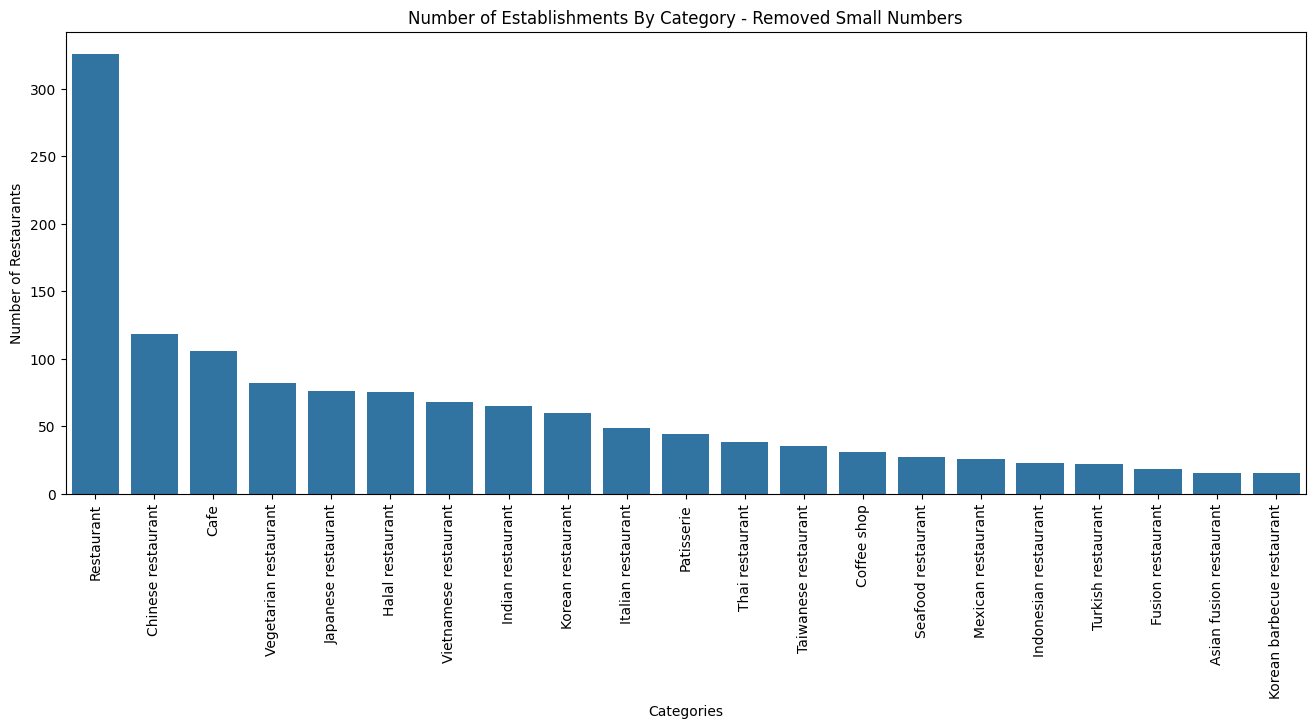

In [61]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants, x='main_category', order=num_restaurants_by_categories_cut.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category - Removed Small Numbers')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

In [69]:
num_restaurants_by_categories_cut.sum() / num_restaurants_by_categories.sum()

0.7593552101324123

#### 🧑🏻‍🍳🧑🏻‍🍳 But doing this means that we lose about 25% of restaurants. So should we recast the minor categories to major categories? We should analyse what kind of ratings those 25% of restaurants have, if too low then we can drop them? Also, more exact categories should be assigned to restaurants currently categorised as 'restaurants'.

----------------------------------------------------

### Rating & Reviews by Category

In [70]:
restaurants_cut = restaurants[restaurants['main_category'].isin(num_restaurants_by_categories_cut.index)]

In [71]:
mean_ratings_by_category = restaurants_cut.groupby('main_category')['main_rating'].mean().sort_values(ascending=False)
mean_ratings_by_category

main_category
Turkish restaurant            4.568182
Italian restaurant            4.440816
Mexican restaurant            4.434615
Vietnamese restaurant         4.375000
Korean barbecue restaurant    4.320000
Vegetarian restaurant         4.278049
Indian restaurant             4.213846
Japanese restaurant           4.205263
Cafe                          4.152830
Thai restaurant               4.134211
Seafood restaurant            4.092593
Asian fusion restaurant       4.073333
Taiwanese restaurant          4.068571
Restaurant                    4.034663
Korean restaurant             4.030000
Chinese restaurant            4.003390
Patisserie                    3.993182
Indonesian restaurant         3.969565
Coffee shop                   3.861290
Halal restaurant              3.668000
Fusion restaurant             2.150000
Name: main_rating, dtype: float64

In [72]:
total_reviews_by_category = restaurants_cut.groupby('main_category')['reviews'].sum().sort_values(ascending=False)
total_reviews_by_category

main_category
Restaurant                    140709
Cafe                           71395
Chinese restaurant             54215
Indian restaurant              53678
Halal restaurant               47024
Vegetarian restaurant          43829
Italian restaurant             36586
Turkish restaurant             34689
Mexican restaurant             31622
Vietnamese restaurant          30846
Korean restaurant              30156
Japanese restaurant            28498
Taiwanese restaurant           26996
Seafood restaurant             23337
Thai restaurant                17565
Korean barbecue restaurant      9951
Indonesian restaurant           9619
Asian fusion restaurant         7150
Coffee shop                     5441
Fusion restaurant               5137
Patisserie                      4327
Name: reviews, dtype: int64

#### 🧑🏻‍🍳🧑🏻‍🍳 Cuisines like Turkish, Italian, Mexican, Vietnamese, Korean BBQ have the highest mean ratings, though they may not have the most reviews

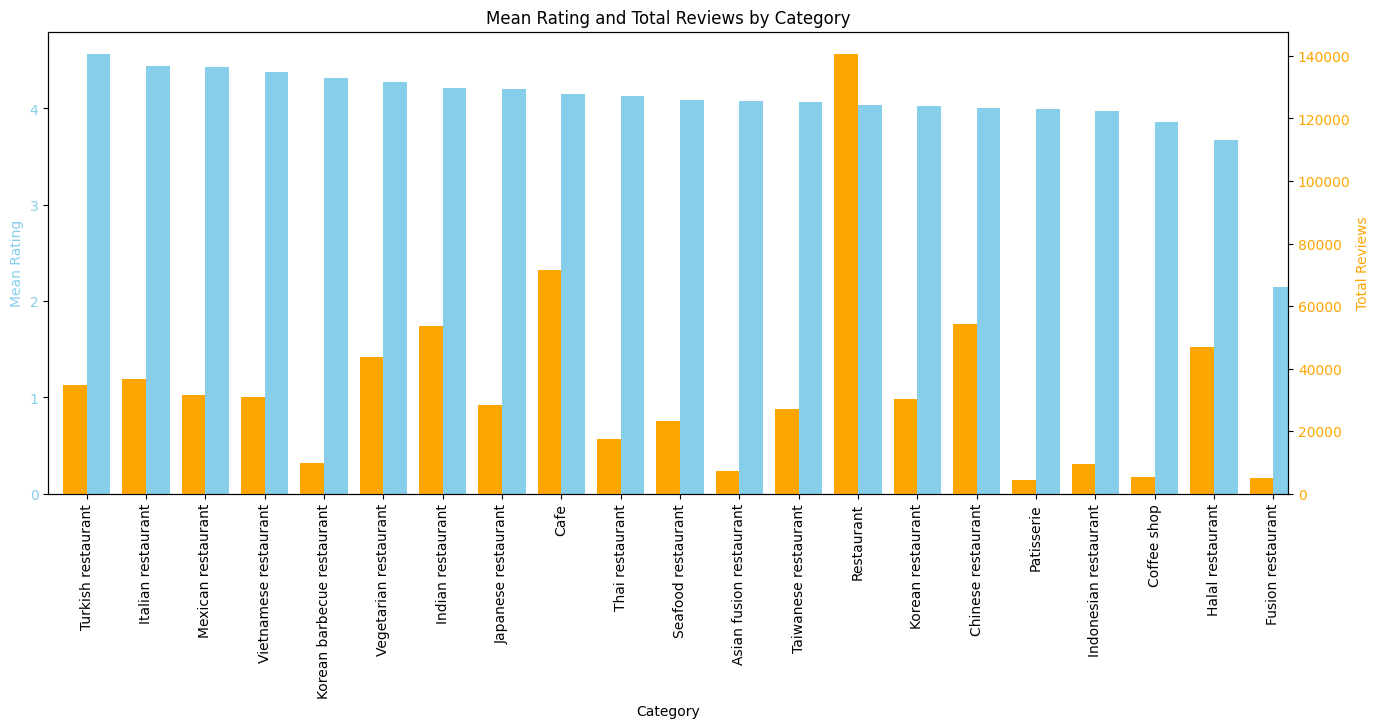

In [74]:
fig, ax1 = plt.subplots(figsize=(16, 6))
mean_ratings_by_category.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)
ax1.set_xlabel('Category')
ax1.set_ylabel('Mean Rating', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Mean Rating and Total Reviews by Category')
ax1.set_xticklabels(mean_ratings_by_category.index, rotation=90)

ax2 = ax1.twinx()
total_reviews_by_category.reindex(mean_ratings_by_category.index).plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4)
ax2.set_ylabel('Total Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()

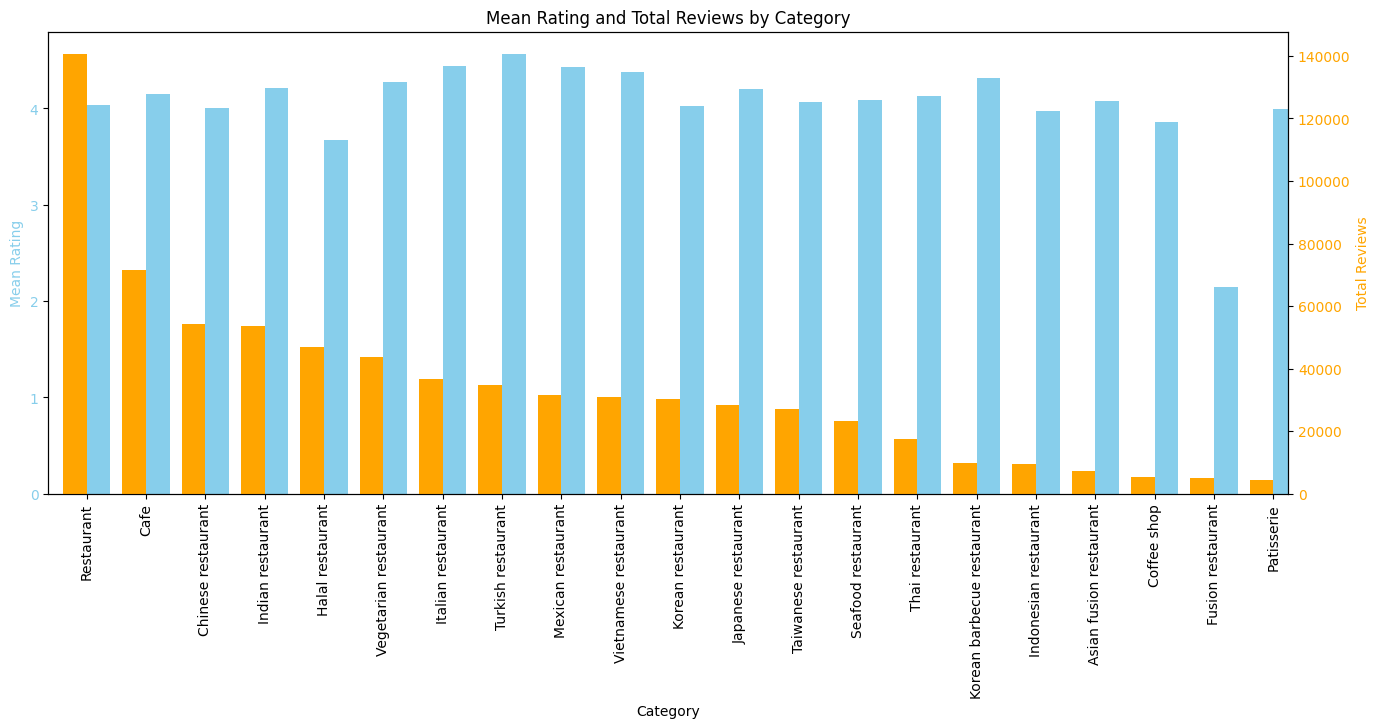

In [73]:
sorted_index = total_reviews_by_category.sort_values(ascending=False).index
mean_ratings_sorted = mean_ratings_by_category.reindex(sorted_index)
total_reviews_sorted = total_reviews_by_category.reindex(sorted_index)

fig, ax1 = plt.subplots(figsize=(16, 6))
mean_ratings_sorted.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)
ax1.set_xlabel('Category')
ax1.set_ylabel('Mean Rating', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Mean Rating and Total Reviews by Category')
ax1.set_xticklabels(mean_ratings_sorted.index, rotation=90)

ax2 = ax1.twinx()
total_reviews_sorted.plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4)
ax2.set_ylabel('Total Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()